<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/MinutosORO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [168]:
import pandas as pd
import numpy as np
from pylab import *

In [160]:
datos=pd.read_csv("GOLD-HastaMarzo15.xlsx")[["time","bid","ask"]][:-1]
datos.index=pd.DatetimeIndex(datos.time).strftime("%Y-%m-%d %H:%M")
datos["precio"]=(datos.ask+datos.bid)/2
datos=datos.groupby(level=0).mean()

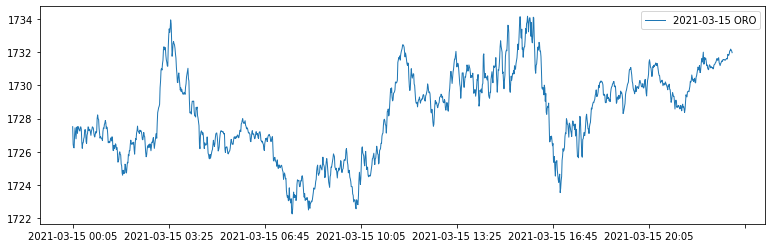

In [215]:
fecha=np.datetime64("2021-03-15")
filtro_dia=(datos.index>str(fecha)) & (datos.index<str(fecha+1) )
precio_dia=datos.loc[filtro_dia].precio
precio_dia.plot(figsize=(13,4),label=str(fecha)+" ORO",legend=True,lw=1,xlabel="") 

show()

In [214]:
datos

,bid,ask,precio
time,,,
2021-02-01 23:00,1858.908281,1859.237922,1859.073102
2021-02-01 23:01,1858.943193,1859.260459,1859.101826
2021-02-01 23:02,1859.039475,1859.312100,1859.175787
2021-02-01 23:03,1859.101222,1859.386222,1859.243722
2021-02-01 23:04,1859.373854,1859.645098,1859.509476
...,...,...,...
2021-03-15 22:54,1731.951333,1732.255778,1732.103556
2021-03-15 22:55,1732.046531,1732.347347,1732.196939
2021-03-15 22:56,1731.956429,1732.289643,1732.123036


In [ ]:
from pandas_datareader import data
import pandas as pd
from pylab import *

In [ ]:
datos=data.DataReader("GC=F","yahoo","2020-01-01","2021-01-01")

In [ ]:
alpha=pd.DataFrame(index=datos.index)
alpha["precio"]=datos["Adj Close"]
alpha["Diferencia"]=alpha.precio.diff()
alpha["signal"]=where(alpha.Diferencia>=0,1,0)

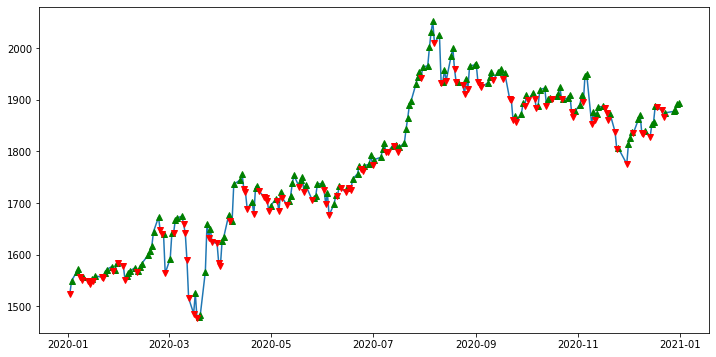

In [ ]:
figure(figsize=(12,6))
plot(alpha.precio)
plot(alpha.loc[alpha.signal==1].index,alpha.precio[alpha.signal==1],"^", color="g")
plot(alpha.loc[alpha.signal==0].index,alpha.precio[alpha.signal==0],"v", color="r")

990.59912109375 TOTAL
-902.5008544921875 EFECTIVO
1893.0999755859375 POSICIONES ABIERTAS


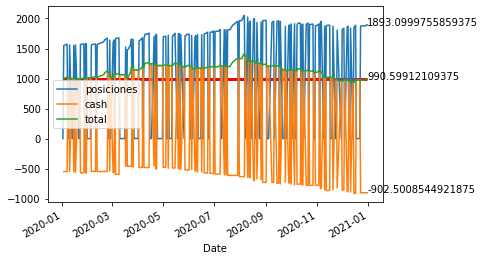

In [ ]:
capital_inicial=1000
posiciones=pd.DataFrame(index=alpha.index.fillna(0))
portafolio=pd.DataFrame(index=alpha.index.fillna(0))
posiciones["activo"]=alpha.signal
portafolio["posiciones"]=posiciones.multiply(alpha.precio,axis=0)
portafolio["cash"]=capital_inicial-(posiciones.diff().multiply(alpha.precio,axis=0)).cumsum()
portafolio["total"]=portafolio.posiciones+portafolio.cash
print("{} TOTAL\n{} EFECTIVO\n{} POSICIONES ABIERTAS".format(portafolio.total[-1],portafolio.cash[-1],portafolio.posiciones[-1]))
portafolio.plot()
text(portafolio.index[-1],portafolio.cash[-1],portafolio.cash[-1])
text(portafolio.index[-1],portafolio.posiciones[-1],portafolio.posiciones[-1])
text(portafolio.index[-1],portafolio.total[-1],portafolio.total[-1])
hlines(capital_inicial,portafolio.index[0],portafolio.index[-1],color="r",lw=3)
show()

In [ ]:
Data=alpha.precio

In [ ]:
for i in range(len(Data)):
  if Data[i,3]<data[i-5,3]

1874.699951171875